# Languages of India

I was just curious about what languages were spoken in which regions of india.

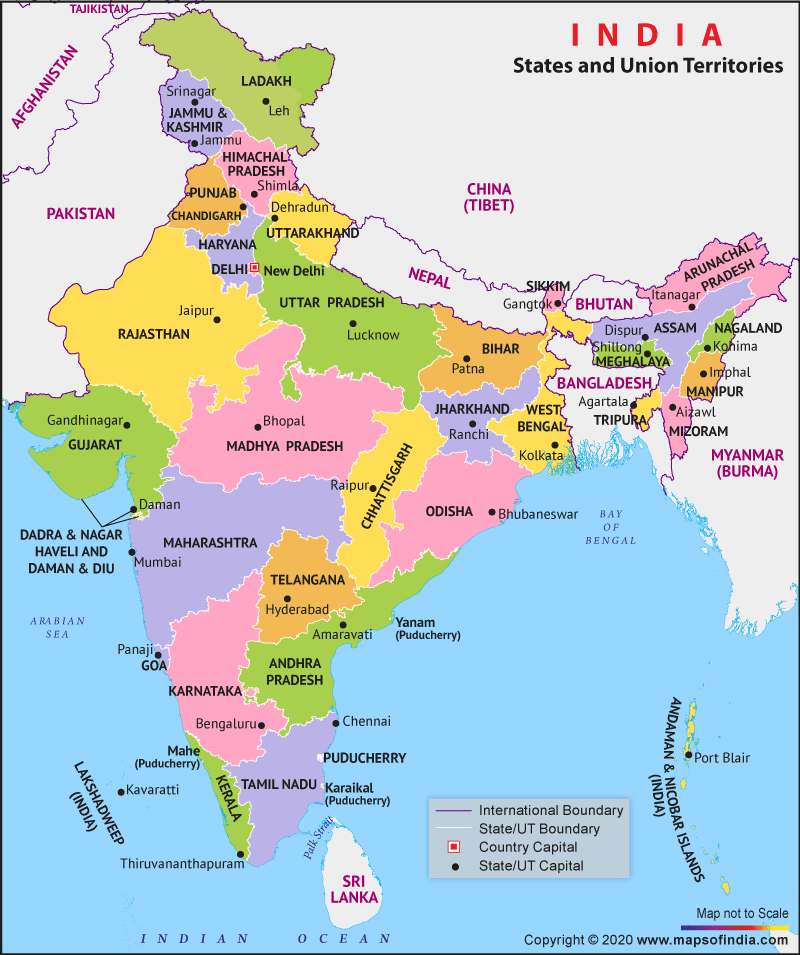

In [1]:
from IPython.display import Image
# from https://www.mapsofindia.com/maps/india/india-political-map.htm
Image("india-political-map.gif")

The first question I wanted to know is what are the dominent languages of the indian states and provinces. I have taken data from the indian census from 2011

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
warnings.filterwarnings(action = 'ignore')

# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

In [3]:
# from https://censusindia.gov.in/2011census/C-16.html
df_og = pd.read_excel('indianlanguages.xlsx')
df_og

,Area name,Mother tongue code,Mother tongue name,Total,Unnamed: 4,Unnamed: 5,Rural,Unnamed: 7,Unnamed: 8,Urban,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,P,M,F,P,M,F,P,M,F
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INDIA,1000.0,1 ASSAMESE,15311351,7810583,7500768,13144701,6697715,6446986,2166650,1112868,1053782
3,INDIA,1002.0,Assamese,14816414,7555350,7261064,12680101,6458345,6221756,2136313,1097005,1039308
4,INDIA,1999.0,1 Others,494937,255233,239704,464600,239370,225230,30337,15863,14474
...,...,...,...,...,...,...,...,...,...,...,...,...
10330,ANDAMAN & NICOBAR ISLANDS,122000.0,122 ZEMI,2,2,0,1,1,0,1,1,0
10331,ANDAMAN & NICOBAR ISLANDS,122003.0,Zemi,2,2,0,1,1,0,1,1,0
10332,ANDAMAN & NICOBAR ISLANDS,123000.0,123 ZOU,2,2,0,0,0,0,2,2,0
10333,ANDAMAN & NICOBAR ISLANDS,123001.0,Zou,2,2,0,0,0,0,2,2,0


I am only interested in the total column at the moment, and so much the genders or whether the person lives in a rural or urban setting. So let us simplify the dataframe a little.
Let's split this up into two dataframes one for the all of india, and the another for all the states and unions.

In [4]:
languages = df_og.iloc[2:,:4]

languages[['Mother tongue code','Total']] = languages[['Mother tongue code', 'Total']].astype(int)

# The mother tongue codes which end in 000 are the parent languages, filter the dataframe by those 
languages = languages[languages['Mother tongue code'].apply(lambda code: code % 1000 == 0)]
# Strip the numbers from the start of the 'Mother tongue name' column
languages['Mother tongue name'] = languages['Mother tongue name'].str.replace('\d+\s','', regex=True)
# drop the Mother tongue code column as it may be confusing because it is missing numbers 99000 & 110000
languages = languages[['Area name', 'Mother tongue name', 'Total']]



# languages of india as a whole
lang_of_india = languages[languages['Area name'] == 'INDIA'].reset_index(drop=True)

display(lang_of_india)

# languages of indian states
lang_indian_states = languages[languages['Area name'] != 'INDIA'].reset_index(drop=True)

display(lang_indian_states)

,Area name,Mother tongue name,Total
0,INDIA,ASSAMESE,15311351
1,INDIA,BENGALI,97237669
2,INDIA,BODO,1482929
3,INDIA,DOGRI,2596767
4,INDIA,GUJARATI,55492554
...,...,...,...
117,INDIA,YIMCHUNGRE,83259
118,INDIA,ZELIANG,63529
119,INDIA,ZEMI,50925
120,INDIA,ZOU,26545


,Area name,Mother tongue name,Total
0,JAMMU & KASHMIR,ASSAMESE,8340
1,JAMMU & KASHMIR,BENGALI,19830
2,JAMMU & KASHMIR,BODO,508
3,JAMMU & KASHMIR,DOGRI,2513712
4,JAMMU & KASHMIR,GUJARATI,19261
...,...,...,...
3111,ANDAMAN & NICOBAR ISLANDS,TRIPURI,26
3112,ANDAMAN & NICOBAR ISLANDS,VAIPHEI,5
3113,ANDAMAN & NICOBAR ISLANDS,ZEMI,2
3114,ANDAMAN & NICOBAR ISLANDS,ZOU,2


Before we get into the whole graphing side of things I wanted create a color palette where each languages is assigned to a particular color. This will make the differences in the popularity of languages more apparent. 

In [5]:
values = sns.color_palette("husl", n_colors=122)
keys = list(lang_of_india['Mother tongue name'].unique()) 

# because there are so many languages I wanted to shuffle the color values 
# so not too many similar colours are next to each other 
random.seed(3)
random.shuffle(values)

color_dict = dict(zip(keys, values))

## languages of India as a whole

Here we will analyse the languages of india as a whole.

Just before we create some bar graphs I just wanted to check if the populations match up if I sum the Total column

In [6]:
display('Sum of the Total column: ' + str(sum(lang_of_india['Total'])))
display('Number of languages: ' + str(len(lang_of_india) - 1) + " (Not including the last entry which is just 'OTHER' languages)")

'Sum of the Total column: 1210854977'

"Number of languages: 121 (Not including the last entry which is just 'OTHER' languages)"

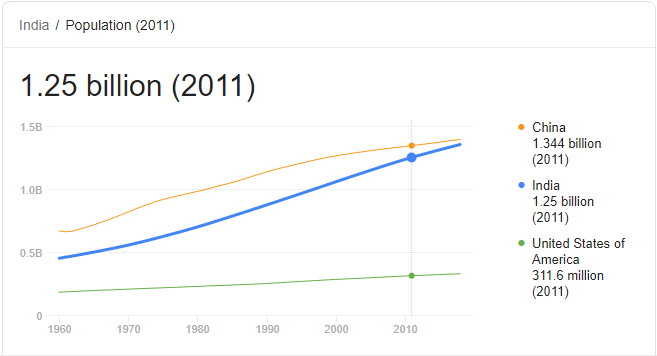

In [7]:
# comparing the census data to a google search 
Image('GoogleSearchIndPop2011.PNG')

We have about 40 million people unaccounted for in this data. This could be because some people did not partake in the census.

Now lets create a bar graph. Since there is 121 languages, I will just graph the top 20.

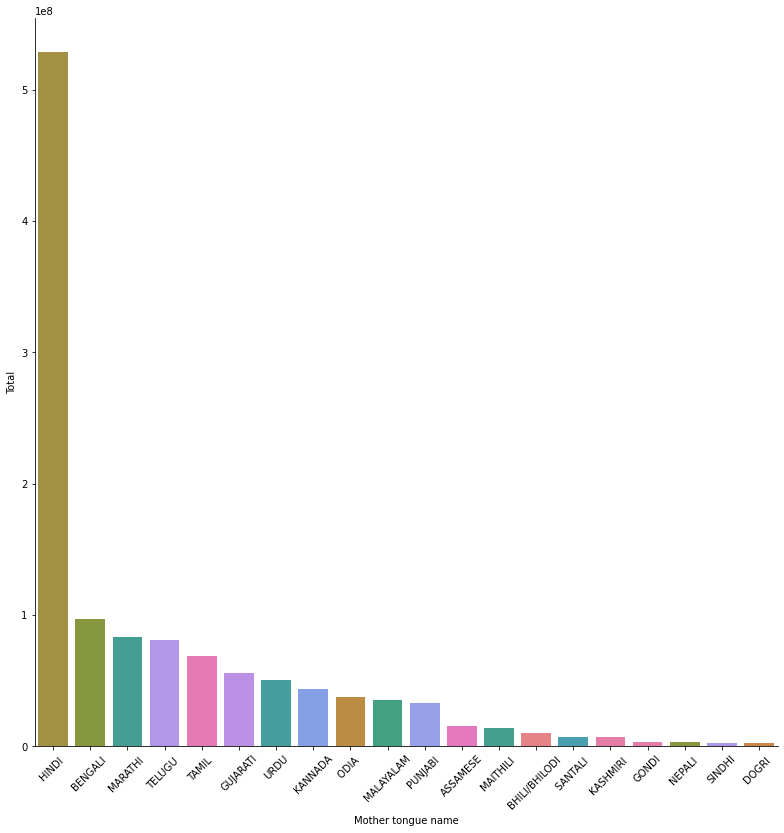

In [8]:
sns.catplot(kind='bar', 
            data=lang_of_india.nlargest(20, 'Total'), 
            x='Mother tongue name', 
            y='Total', 
            height=11,
            palette=color_dict
           )
plt.xticks(rotation=45)
plt.show()

## India by region
There a 35 states/unions as of 2011 when the census took place.

create a pallette dictionary to map each language to a color.
https://stackoverflow.com/questions/46173419/seaborn-change-bar-colour-according-to-hue-name

In [9]:
len(lang_indian_states['Area name'].unique())

35

In [10]:
region_options = list(lang_indian_states['Area name'].unique())

menu = widgets.Dropdown(
    options=region_options,
    value='GOA',
    description='Number:',
    disabled=False,
)

def lang_region(region):
    region_df = lang_indian_states[lang_indian_states['Area name'] == region].nlargest(15, 'Total')
    sns.catplot(kind='bar', 
            data=region_df, 
            x='Mother tongue name', 
            y='Total', 
            height=11,
            palette=color_dict
           )
    plt.title(region)
    plt.xticks(rotation=45)
    plt.show()

widgets.interact(lang_region, region=menu)


interactive(children=(Dropdown(description='Number:', index=29, options=('JAMMU & KASHMIR', 'HIMACHAL PRADESH'…

<function __main__.lang_region(region)>

Analysis

In how many of the regions is Hindi in the top 5 languages

- compare this to the amount of languages spoken in australia retrieved data from https://profile.id.com.au/australia/language
in excel document LanguageAus.xls and LangaugeTotals.xls

- create a GIS heat map of the languages spoken in different regions of the India.
https://plotly.com/python/choropleth-maps/

- https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

- https://towardsdatascience.com/intro-to-geographical-plotting-237f59fec735